## Project 2 TAA Blog

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Processing the data

In [2]:
df = pd.read_csv('housepricedata.csv')
dataset = df.values

X = dataset[:,:-1]
Y = dataset[:,-1]


In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [4]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


### Blog NN 

In [5]:
from keras.models import Sequential
from keras.layers import Dense

2022-06-29 19:26:08.744222: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-29 19:26:08.744261: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Define architecture

In [6]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

2022-06-29 19:26:13.231200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-29 19:26:13.231229: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-29 19:26:13.231249: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vicente): /proc/driver/nvidia/version does not exist
2022-06-29 19:26:13.232679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

In [8]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 26ms/step - loss: 0.6958 - accuracy: 0.4834 - precision: 0.4891 - recall: 0.4344 - val_loss: 0.6935 - val_accuracy: 0.4612 - val_precision: 0.4603 - val_recall: 0.8447
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5225 - precision: 0.5154 - recall: 0.9691 - val_loss: 0.6881 - val_accuracy: 0.4795 - val_precision: 0.4744 - val_recall: 0.9903
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.5176 - precision: 0.5124 - recall: 0.9981 - val_loss: 0.6834 - val_accuracy: 0.4795 - val_precision: 0.4747 - val_recall: 1.0000
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6761 - accuracy: 0.5157 - precision: 0.5114 - recall: 1.0000 - val_loss: 0.6792 - val_accuracy: 0.4795 - val_precision: 0.4747 - val_recall: 1.0000
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6712 - accuracy: 0.5176 - precis

Epoch 38/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.8748 - precision: 0.8339 - recall: 0.9402 - val_loss: 0.4316 - val_accuracy: 0.8721 - val_precision: 0.8319 - val_recall: 0.9126
Epoch 39/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4283 - accuracy: 0.8708 - precision: 0.8339 - recall: 0.9305 - val_loss: 0.4241 - val_accuracy: 0.8721 - val_precision: 0.8319 - val_recall: 0.9126
Epoch 40/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4213 - accuracy: 0.8767 - precision: 0.8391 - recall: 0.9363 - val_loss: 0.4171 - val_accuracy: 0.8721 - val_precision: 0.8319 - val_recall: 0.9126
Epoch 41/100
32/32 [==============================] - 0s 6ms/step - loss: 0.4145 - accuracy: 0.8718 - precision: 0.8365 - recall: 0.9286 - val_loss: 0.4104 - val_accuracy: 0.8721 - val_precision: 0.8319 - val_recall: 0.9126
Epoch 42/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8738 - pr

32/32 [==============================] - 0s 4ms/step - loss: 0.3106 - accuracy: 0.8845 - precision: 0.8745 - recall: 0.9015 - val_loss: 0.3054 - val_accuracy: 0.8813 - val_precision: 0.8598 - val_recall: 0.8932
Epoch 75/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8826 - precision: 0.8685 - recall: 0.9054 - val_loss: 0.3048 - val_accuracy: 0.8813 - val_precision: 0.8667 - val_recall: 0.8835
Epoch 76/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.8806 - precision: 0.8667 - recall: 0.9035 - val_loss: 0.3054 - val_accuracy: 0.8813 - val_precision: 0.8667 - val_recall: 0.8835
Epoch 77/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8845 - precision: 0.8788 - recall: 0.8958 - val_loss: 0.3022 - val_accuracy: 0.8813 - val_precision: 0.8667 - val_recall: 0.8835
Epoch 78/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3063 - accuracy: 0.8845 - precision: 0.87

In [9]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2513 - accuracy: 0.8858 - precision: 0.8596 - recall: 0.9159


0.8858447670936584

### Loss visualization

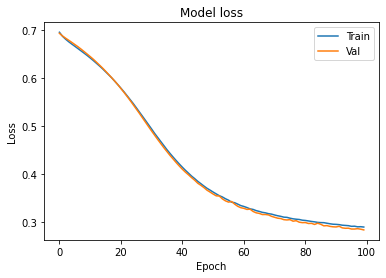

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

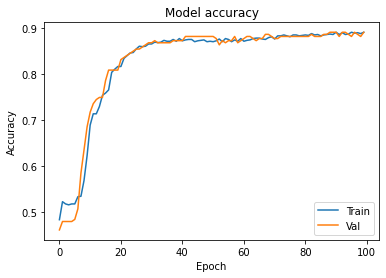

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Add Regularization

In [12]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 4s 63ms/step - loss: 0.4663 - accuracy: 0.7652 - precision: 0.7397 - recall: 0.8282 - val_loss: 0.3675 - val_accuracy: 0.8402 - val_precision: 0.7881 - val_recall: 0.9029
Epoch 2/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3472 - accuracy: 0.8591 - precision: 0.8281 - recall: 0.9112 - val_loss: 0.3990 - val_accuracy: 0.8813 - val_precision: 0.9425 - val_recall: 0.7961
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3480 - accuracy: 0.8474 - precision: 0.8232 - recall: 0.8900 - val_loss: 0.3100 - val_accuracy: 0.8676 - val_precision: 0.8700 - val_recall: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3004 - accuracy: 0.8728 - precision: 0.8619 - recall: 0.8919 - val_loss: 0.5169 - val_accuracy: 0.8402 - val_precision: 0.9722 - val_recall: 0.6796
Epoch 5/100
32/32 [==============================] - 1s 47ms/step - loss: 0.2952 - accuracy: 0.8728 - pr

32/32 [==============================] - 1s 38ms/step - loss: 0.1899 - accuracy: 0.9237 - precision: 0.9264 - recall: 0.9228 - val_loss: 0.2675 - val_accuracy: 0.8813 - val_precision: 0.8667 - val_recall: 0.8835
Epoch 38/100
32/32 [==============================] - 1s 38ms/step - loss: 0.1782 - accuracy: 0.9276 - precision: 0.9253 - recall: 0.9324 - val_loss: 0.2959 - val_accuracy: 0.8767 - val_precision: 0.8585 - val_recall: 0.8835
Epoch 39/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1778 - accuracy: 0.9276 - precision: 0.9286 - recall: 0.9286 - val_loss: 0.2703 - val_accuracy: 0.8721 - val_precision: 0.8641 - val_recall: 0.8641
Epoch 40/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1835 - accuracy: 0.9217 - precision: 0.9311 - recall: 0.9131 - val_loss: 0.3044 - val_accuracy: 0.8858 - val_precision: 0.9149 - val_recall: 0.8350
Epoch 41/100
32/32 [==============================] - 1s 44ms/step - loss: 0.1814 - accuracy: 0.9256 - precision:

32/32 [==============================] - 2s 58ms/step - loss: 0.1505 - accuracy: 0.9384 - precision: 0.9383 - recall: 0.9402 - val_loss: 0.7242 - val_accuracy: 0.8584 - val_precision: 0.9390 - val_recall: 0.7476
Epoch 74/100
32/32 [==============================] - 2s 61ms/step - loss: 0.1702 - accuracy: 0.9266 - precision: 0.9235 - recall: 0.9324 - val_loss: 0.3857 - val_accuracy: 0.8721 - val_precision: 0.9310 - val_recall: 0.7864
Epoch 75/100
32/32 [==============================] - 2s 47ms/step - loss: 0.1428 - accuracy: 0.9423 - precision: 0.9388 - recall: 0.9479 - val_loss: 0.3659 - val_accuracy: 0.8767 - val_precision: 0.9222 - val_recall: 0.8058
Epoch 76/100
32/32 [==============================] - 2s 52ms/step - loss: 0.1365 - accuracy: 0.9423 - precision: 0.9388 - recall: 0.9479 - val_loss: 0.4783 - val_accuracy: 0.8676 - val_precision: 0.9625 - val_recall: 0.7476
Epoch 77/100
32/32 [==============================] - 1s 46ms/step - loss: 0.1232 - accuracy: 0.9423 - precision:

In [13]:
model_2.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 7ms/step - loss: 0.4007 - accuracy: 0.8858 - precision: 0.8534 - recall: 0.9252


0.8858447670936584

### Loss visualization

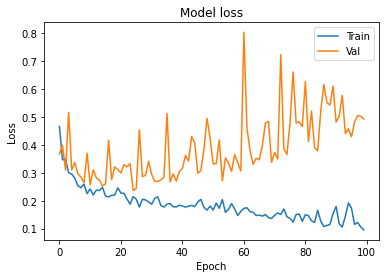

In [14]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

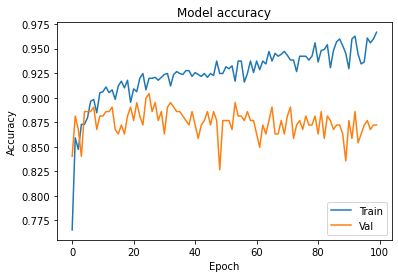

In [15]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Reduce Overfitting

In [16]:
from keras.layers import Dropout
from keras import regularizers

In [17]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 4s 68ms/step - loss: 14.2248 - accuracy: 0.6957 - precision: 0.6439 - recall: 0.8938 - val_loss: 3.8721 - val_accuracy: 0.8219 - val_precision: 0.7581 - val_recall: 0.9126
Epoch 2/100
32/32 [==============================] - 2s 52ms/step - loss: 1.6924 - accuracy: 0.8258 - precision: 0.8004 - recall: 0.8745 - val_loss: 0.6979 - val_accuracy: 0.8539 - val_precision: 0.9080 - val_recall: 0.7670
Epoch 3/100
32/32 [==============================] - 2s 65ms/step - loss: 0.5816 - accuracy: 0.8591 - precision: 0.8489 - recall: 0.8784 - val_loss: 0.5055 - val_accuracy: 0.8676 - val_precision: 0.8558 - val_recall: 0.8641
Epoch 4/100
32/32 [==============================] - 2s 68ms/step - loss: 0.5395 - accuracy: 0.8552 - precision: 0.8477 - recall: 0.8707 - val_loss: 0.5200 - val_accuracy: 0.8676 - val_precision: 0.8136 - val_recall: 0.9320
Epoch 5/100
32/32 [==============================] - 2s 73ms/step - loss: 0.5227 - accuracy: 0.8493 - p

32/32 [==============================] - 2s 60ms/step - loss: 0.4525 - accuracy: 0.8787 - precision: 0.8621 - recall: 0.9054 - val_loss: 0.4294 - val_accuracy: 0.8904 - val_precision: 0.8762 - val_recall: 0.8932
Epoch 38/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4736 - accuracy: 0.8659 - precision: 0.8561 - recall: 0.8842 - val_loss: 0.4755 - val_accuracy: 0.8402 - val_precision: 0.7698 - val_recall: 0.9417
Epoch 39/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4404 - accuracy: 0.8885 - precision: 0.8769 - recall: 0.9073 - val_loss: 0.4224 - val_accuracy: 0.8858 - val_precision: 0.8750 - val_recall: 0.8835
Epoch 40/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4575 - accuracy: 0.8699 - precision: 0.8612 - recall: 0.8861 - val_loss: 0.4341 - val_accuracy: 0.8950 - val_precision: 0.9000 - val_recall: 0.8738
Epoch 41/100
32/32 [==============================] - 2s 55ms/step - loss: 0.4394 - accuracy: 0.8845 - precision:

32/32 [==============================] - 2s 52ms/step - loss: 0.4360 - accuracy: 0.8885 - precision: 0.8811 - recall: 0.9015 - val_loss: 0.4322 - val_accuracy: 0.8767 - val_precision: 0.9130 - val_recall: 0.8155
Epoch 74/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4370 - accuracy: 0.8806 - precision: 0.8793 - recall: 0.8861 - val_loss: 0.4472 - val_accuracy: 0.8676 - val_precision: 0.9205 - val_recall: 0.7864
Epoch 75/100
32/32 [==============================] - 1s 43ms/step - loss: 0.4351 - accuracy: 0.8845 - precision: 0.8745 - recall: 0.9015 - val_loss: 0.4664 - val_accuracy: 0.8721 - val_precision: 0.9518 - val_recall: 0.7670
Epoch 76/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4414 - accuracy: 0.8836 - precision: 0.8786 - recall: 0.8938 - val_loss: 0.4351 - val_accuracy: 0.8721 - val_precision: 0.9121 - val_recall: 0.8058
Epoch 77/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4520 - accuracy: 0.8699 - precision:

In [18]:
model_3.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 12ms/step - loss: 0.3802 - accuracy: 0.9087 - precision: 0.9065 - recall: 0.9065


0.9086757898330688

### Loss visualization

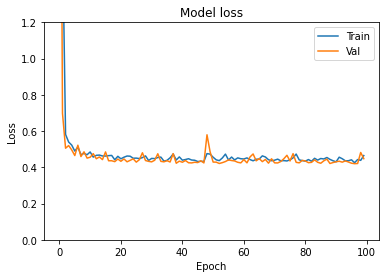

In [19]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

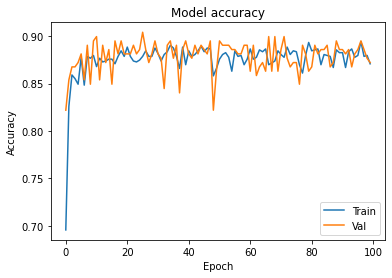

In [20]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()